Latex support $f(x)$ 

$$ \int f(x)\, dx $$

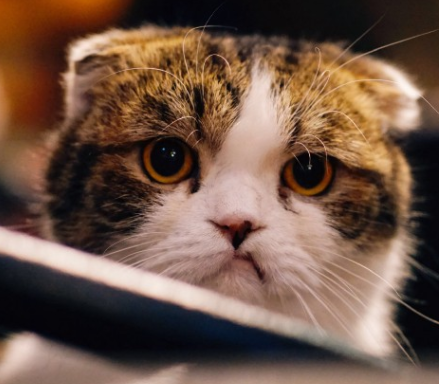

*You know it’s out there. You know there’s free GPU somewhere, hanging like a fat, juicy, ripe blackberry on a branch just slightly out of reach.*
[Funny Colab introduction on towardsdatascience](https://towardsdatascience.com/getting-started-with-google-colab-f2fff97f594c)

##Without any setup required, you can execute the following code cells:
To do so click into the cell and press Shift+Enter

Clone Ema's repository:

In [ ]:
!git clone https://github.com/Crypto-TII/deep_learning_vs_conventional_distinguishers

Cloning into 'deep_learning_vs_conventional_distinguishers'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 95 (delta 18), reused 92 (delta 18), pack-reused 0
Unpacking objects: 100% (95/95), done.


In [ ]:
%cd deep_learning_vs_conventional_distinguishers/machinelearning_distinguisher

/content/deep_learning_vs_conventional_distinguishers/machinelearning_distinguisher


Execute some code from the `train_and_test_model.py`

In [ ]:
import datetime
from network_utils import *

total_results = []

#### START CONFIG
NET = "TD" #TD or CNN
CIPHER = "TEA" #TEA or RAIDEN
ROUNDS_LIST = [6] # [1,2] #TEA up to 64, RAIDEN up to 32
N_TRAINING_INPUT_PAIRS = [1000000]
N_TRIES_CLASSIFICATION = 4
#INPUT_DIFFS =  [0x7fffff0000000000] #RAIDEN
INPUT_DIFFS = [0xfffffff1ffffffff] #TEA
KEY = 0x11CAD84E96168E6B704A8B1C57BBE5D3 #TEA
#KEY = -1 #RAIDEN
EPOCHS = 10
EPOCHS_CYCLE = 5
BATCH = 500
MINLR = 0.0003
MAXLR = 0.015
THRESHOLD = 0.5*N_TRIES_CLASSIFICATION
LAYERS = [64,64,32]
VERBOSE = 1
#### END CONFIG

In [ ]:
scheduler = cyclic_lr(EPOCHS_CYCLE,MAXLR,MINLR)
for DELTA in INPUT_DIFFS:
    for N_TRAINING_SAMPLES in N_TRAINING_INPUT_PAIRS:
        results = {}
        for N_ROUNDS in ROUNDS_LIST:
            model = train_network_words(NET, LAYERS, scheduler, N_TRAINING_SAMPLES, CIPHER, DELTA, N_ROUNDS, KEY, EPOCHS, BATCH, VERBOSE)
            # model_to_file(model, CIPHER, N_ROUNDS, N_TRAINING_SAMPLES)
            total_accuracy, accuracy_from_cipher, accuracy_from_random = distinguisher(0, model, 10000, THRESHOLD, N_TRIES_CLASSIFICATION, CIPHER, DELTA, N_ROUNDS, KEY, 0)
            results[N_ROUNDS] = (total_accuracy, accuracy_from_cipher, accuracy_from_random)
        total_results.append((N_TRAINING_SAMPLES,DELTA,results))

print(total_results)